In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [48]:
train = pd.read_csv('tokenized_train_data.csv')
test = pd.read_csv('tokenized_test_data.csv')
master = pd.concat([train, test])

In [8]:
train_token_lyrs = train['tokenized_lyrics'].values
test_token_lyrs = test['tokenized_lyrics'].values
train_lr_val = train['lr_valence'].values
test_lr_val = test['lr_valence'].values


In [63]:
feature_num_list = []
train_auc_scores = []
test_auc_scores = []
for i in range(100, 1001, 100):
    train, test = train_test_split(master, test_size=0.25, random_state=42)
    train_token_lyrs = train['tokenized_lyrics'].values
    test_token_lyrs = test['tokenized_lyrics'].values
    train_lr_val = train['lr_valence'].values
    test_lr_val = test['lr_valence'].values
    print('running with', i, 'features')
    # create vectorizer limited to i documents ranked by highest df frequency
    vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = i)
    # get X train 2d array of train features
    X_train = vectorizer.fit_transform(train_token_lyrs).toarray()
    vocab = vectorizer.get_feature_names()
    # Train model
    model = LogisticRegression(max_iter = 10000).fit(X_train, train_lr_val)

    # get train y predictions
    train_pred = model.predict(X_train)
    # get train auc scores
    train_auc = roc_auc_score(train_lr_val, train_pred)
    train_auc_scores.append(train_auc)
    
    
    # create vectorizer for test data
    test_vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = i, vocabulary= vocab)
    # get X test 2d array of train features
    X_test = test_vectorizer.fit_transform(test_token_lyrs).toarray()
    # get test y predictions
    test_pred = model.predict(X_test)
    # get train auc scores
    test_auc = roc_auc_score(test_lr_val, test_pred)
    test_auc_scores.append(test_auc)
    
    feature_num_list.append(i)

running with 100 features
running with 200 features
running with 300 features
running with 400 features
running with 500 features
running with 600 features
running with 700 features
running with 800 features
running with 900 features
running with 1000 features


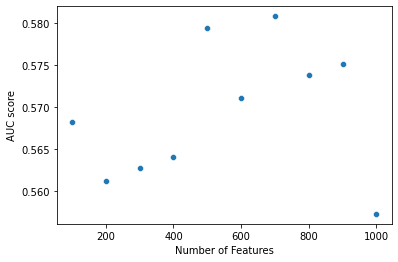

In [64]:
test_plot = sns.scatterplot(x=feature_num_list, y=test_auc_scores)
plt.ylabel('AUC score')
plt.xlabel('Number of Features')
test_plot = test_plot.get_figure()
test_plot.savefig("1000_feature_auc_test_scatter.png")

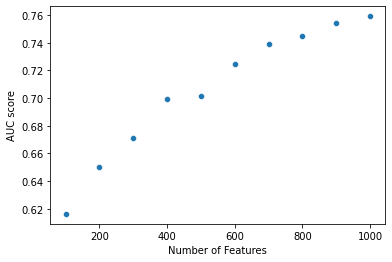

In [65]:
train_plot = sns.scatterplot(x=feature_num_list, y=train_auc_scores)
plt.ylabel('AUC score')
plt.xlabel('Number of Features')
train_plot = train_plot.get_figure()
train_plot.savefig("1000_feature_auc_train_scatter.png")

In [37]:
print(test_auc_scores)
# Highest AUC is with 200 features: 0.5938842182216943

[0.542416765664504, 0.5938842182216943, 0.5729271375917634, 0.564862621462731, 0.5647179323159401, 0.561957415699534, 0.556219348746535, 0.5601792622376558, 0.5587628316427549]


In [39]:
# create vectorizer limited to i documents ranked by highest df frequency
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = 200)
# get X train 2d array of train features
X_train = vectorizer.fit_transform(train_token_lyrs).toarray()
vocab = vectorizer.get_feature_names()
# Train model
model = LogisticRegression(max_iter = 10000).fit(X_train, train_lr_val)

In [43]:
# Save the model that did the best in terms of testing
pickle.dump(model, open('200_feature_model.sav', 'wb'))